There are totally three different files in this project.

<ol>
    <li><b>movie_story_student_file.csv</b>: This file contains the movie stories that should be used by students for model development.</li>
    <li><b>movie_story_evaluation_file.csv</b>: This file should NOT be used for model development purposes. Students should only use this file after developing their predictive models and selecting their best final model. They then need to use their best predictive model and predict whether or not the movies in <b>movie story evaluation file.csv</b> are Comedy.</li>
    <li><b>movies.csv</b>: This file contain the movie genres.</li>
</ol>

<b>Step 2:</b> There are 20,000 movies in `movie_story_student_file.csv`file. Use the `movies.csv` file to determine whether a movie is Comedy or not. The final output of this step should be development of a dataframe file that contains three columns: 1) movieId, 2) story, 3) ComedyGenre. The value for the thirrd column should be in a binary format. If the movie is comedy the value should be 1, otherwise 0. Name the new file as `main_dataset`. <br />
<b>Step 3:</b> If you want to just have one train and one test set, then split the `main_dataset` to train and test sets. Otherwise you can use cross validation methods.  <br />
<b>Step 4:</b> Use your supervised learning and text analysis knowledge to develope different predictive models (i.e. logestic regression, random forest, ...). Test the performance of your models in terms of accuracy, precision, recall, and F1 scores. <br />
<b>Step 5:</b> Choose one of your best models (only one). Then use the full data available in `main dataset` to train that model.<br />
<b>Step 6:</b> Prepare data in `movie_story_evaluation_file.csv` for prediction. You need to perform the exact same steps that you have done in <b>Step 2</b> to prepare this new dataset. Name the new dataset as `evaluation_dataset`. <br />
<b>Step 7:</b> Use your selected model in Step 5 to predict whether or not movies in `evaluation_dataset` are Comedy movies. <br />
<b>Step 8:</b> Report the final accuracy, precision, recall and F1 score. <br />

Keep in mind that the above steps are only provide guidelines. There are more detail works in this project that should be identified by students. 

In [1]:
import pandas as pd

In [2]:
# Step 2 Read the data sets
story_movie_data = pd.read_csv("movie_story_student_file.csv")
genre_movie = pd.read_csv("movies.csv")

In [3]:
# Merge the story and genre dataset
merge_set = pd.merge(story_movie_data, genre_movie, left_on ='movie_id', right_on='movieId').drop('movieId', axis = 1).drop('title', axis = 1)
merge_set.isnull().any()

movie_id    False
story       False
genres      False
dtype: bool

In [4]:
# Map the comedy and non-comedy movies to 1 and 0 respectively
new_data = merge_set['genres'].str.contains("Comedy").map({False:0,True:1})
merge_set['ComedyGenre'] = new_data

#main_dataset = merge_set.rename(columns={"story": "story", "movieId": "movieId","genres":"ComedyGenre"})  

In [5]:
# Remove the unwanted columns and prepare main_dataset
merge_set.pop('genres')
main_dataset = merge_set.copy()

In [6]:
# View main dataset
main_dataset

movie_id                                              story  \
0        131072  A girl who always tends to fall in love with t...   
1        196609  Bigfoot has come to the town of Ellwood City, ...   
2        131074  At an altitude of 18,000 feet, Alaska\'s Mount...   
3        196611  In her first special since 2003, Ellen revisit...   
4        196613  Mike and Sulley are back at Monsters Universit...   
...         ...                                                ...   
19995     56801  The iconic creatures from two of the scariest ...   
19996    122337  When a bored-with-life English teacher meets a...   
19997    187875  Herbert Blount is a crowdfunding contributor f...   
19998    187873  REAL BOY is the coming-of-age story of Bennett...   
19999     56805  Following a childhood tragedy, Dewey Cox follo...   

       ComedyGenre  
0                1  
1                1  
2                0  
3                1  
4                1  
...            ...  
19995            0  
19996            0  
19997            0  
19998            0  
19999            1  

[20000 rows x 3 columns]

In [7]:
# Exploratory Analysis : Visualizing Comedy and Non-Comedy movie count in dataset 
count=[]
c=0
for i in range(len(main_dataset)):
    if main_dataset.ComedyGenre[i] == 1:
        count.append(i)
        c=c+1
c

5266

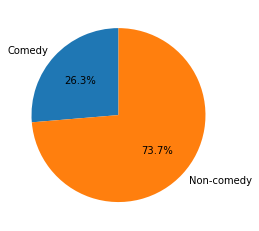

In [8]:
import matplotlib.pyplot as plt
nc = 20000-c
vals = [c, nc]
label = ['Comedy','Non-comedy']
inds=range(len(vals))
plt.pie(vals, labels= label, startangle=90, autopct='%1.1f%%') 
plt.show()

In [9]:
# Data Cleaning and Pre-processing : Convert the data is story to lower case
main_dataset['story'] = main_dataset['story'].apply(lambda x: " ".join(x.lower() for x in x.split()))
main_dataset['story'].head()

0    a girl who always tends to fall in love with t...
1    bigfoot has come to the town of ellwood city, ...
2    at an altitude of 18,000 feet, alaska\'s mount...
3    in her first special since 2003, ellen revisit...
4    mike and sulley are back at monsters universit...
Name: story, dtype: object

In [10]:
# Remove Special characters from story
main_dataset['story'] = main_dataset['story'].str.replace('[^\w\s]','')
main_dataset['story'].head()

0    a girl who always tends to fall in love with t...
1    bigfoot has come to the town of ellwood city p...
2    at an altitude of 18000 feet alaskas mount st ...
3    in her first special since 2003 ellen revisits...
4    mike and sulley are back at monsters universit...
Name: story, dtype: object

In [11]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Chinmayi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
# Remove Stop words from Story

from nltk.corpus import stopwords
stop = stopwords.words('english')
main_dataset['story']  = main_dataset['story'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
main_dataset['story'] .head()

0    girl always tends fall love wrong guy meets on...
1    bigfoot come town ellwood city pa causing big ...
2    altitude 18000 feet alaskas mount st elias des...
3    first special since 2003 ellen revisits road s...
4    mike sulley back monsters university funfilled...
Name: story, dtype: object

In [13]:
# Use the Stemming on the story to remove the suffixes like "ing","ly","s"
from nltk.stem import PorterStemmer
st = PorterStemmer()
main_dataset['story'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0        girl alway tend fall love wrong guy meet one b...
1        bigfoot come town ellwood citi pa caus big pro...
2        altitud 18000 feet alaska mount st elia destin...
3        first special sinc 2003 ellen revisit road sta...
4        mike sulley back monster univers funfil weeken...
                               ...                        
19995    icon creatur two scariest film franchis movi h...
19996    boredwithlif english teacher meet west coast s...
19997    herbert blount crowdfund contributor new adam ...
19998    real boy comingofag stori bennett wallac trans...
19999    follow childhood tragedi dewey cox follow long...
Name: story, Length: 20000, dtype: object

In [14]:
# Use the Lemmitizing to convert the word into ints root word
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
Lemmatizer = WordNetLemmatizer()

for text in main_dataset['story']:
    tokens = word_tokenize(text)
    print([Lemmatizer.lemmatize(token, pos="v") for token in tokens])
main_dataset['story']

['girl', 'always', 'tend', 'fall', 'love', 'wrong', 'guy', 'meet', 'one', 'believe', 'world', 'come', 'end', 'next', 'tuesday']
['bigfoot', 'come', 'town', 'ellwood', 'city', 'pa', 'cause', 'big', 'problems', 'itxe2x80x99s', 'three', 'town', 'locals', 'take', 'fund', 'kickstarter', 'campaign', 'film', 'ellwood', 'city', 'la', 'filmmaker', 'hometown', 'hero', 'jar', 'show', 'assemble', 'colorful', 'cast', 'character', 'region', 'bring', 'vision', 'life', 'movie', 'feature', 'pittsburghxe2x80x99s', 'famous', 'best', 'love', 'celebrities', 'like', 'curt', 'wootton', 'pittsburgh', 'dad', 'joanie', 'dodds', 'americaxe2x80x99s', 'next', 'top', 'model', 'jim', 'krenn', 'standup', 'comic', 'formerly', 'wdve', 'morning', 'show', 'mike', 'wysocki', 'wdve', 'even', 'veteran', 'news', 'anchor', 'darieth', 'chisolm', 'formerly', 'wpxi', 'among', 'others', 'comedyhorror', 'flick', 'mullets', 'gun', 'beer', 'full', 'supply', 'movie', 'skewer', 'pittsburgh', 'xe2x80x98yinzerxe2x80x99', 'stereotype', '

['jam', 'serve', 'time', 'drown', 'little', 'boy', 'child', 'although', 'body', 'never', 'find', 'river', 'visit', 'victims', 'mother', 'upon', 'parole', 'send', 'quest', 'find', 'truth', 'little', 'time', 'danger', 'every', 'turn', 'jam', 'risk', 'freedom', 'life', 'uncover', 'trail', 'sin', 'might', 'give', 'closure', 'grieve', 'mother']
['recent', 'high', 'school', 'graduate', 'care', 'mother', 'navigate', 'first', 'relationship', 'wake', 'father', 'suicide']
['lonely', 'boy', 'win', 'distant', 'father', 'strict', 'grandmother', 'help', 'brave', 'velveteen', 'rabbit', 'whose', 'one', 'wish', 'become', 'real', 'rabbit', 'someday']
['eleven', 'years', 'old', 'tildas', 'parent', 'put', 'beloved', 'grandfather', 'old', 'people', 'home', 'due', 'progress', 'alzheimer', 'disease', 'take', 'one', 'last', 'adventure', 'subliminally', 'threaten', 'tear', 'family', 'apart']
['craze', 'members', 'sadistic', 'family', 'return', 'childhood', 'home', 'terrorize', 'new', 'owners']
['er', 'nurse', 

['alex', 'mastermind', 'ambitious', 'plan', 'steal', 'millions', 'untraceable', 'cash', 'stack', 'underground', 'vault', 'london', 'exchange', 'bank', 'wait', 'last', 'journey', 'incineration', 'lucky', 'matty', 'terry', 'chubby', 'norman', 'jay', 'make', 'unlikely', 'gang', 'robbers', 'set', 'alibi', 'gang', 'check', 'flight', 'join', 'thousands', 'england', 'supporters', 'part', 'mass', 'exodus', 'world', 'cup', 'tournament', 'germany']
['man', 'mission', 'mar', 'astronaut', 'mark', 'watney', 'presume', 'dead', 'fierce', 'storm', 'leave', 'behind', 'crew', 'watney', 'survive', 'find', 'strand', 'alone', 'hostile', 'planet', 'meager', 'supply', 'must', 'draw', 'upon', 'ingenuity', 'wit', 'spirit', 'subsist', 'find', 'way', 'signal', 'earth', 'alive']
['love', 'story', 'polish', 'guestworker', 'farmers', 'daughter', 'strawberry', 'field', 'sweden']
['group', 'young', 'women', 'ouagadougou', 'study', 'girl', 'school', 'become', 'auto', 'mechanics', 'classmates', 'become', 'port', 'safet

['investigation', 'serial', 'killer', 'lead', 'two', 'detectives', 'discover', 'dr', 'frankenstein', 'creature', 'still', 'alive', 'two', 'centuries', 'genetic', 'experiment']
['shred', 'motion', 'picture', 'tell', 'story', 'two', 'wash', 'pro', 'snowboarders', '90s', 'name', 'max', 'play', 'dave', 'england', 'eddie', 'play', 'renee', 'renee', 'attempt', 'cash', 'fantastic', 'growth', 'sport', 'start', 'snowboard', 'camp', 'hop', 'recapture', 'former', 'glory', 'begin', 'share', 'wacky', 'wisdom', 'group', 'come', 'young', 'snowboarders', 'story', 'take', 'run', 'ski', 'hill', 'grow', 'major', 'event', 'one', 'biggest', 'resort', 'west']
['sara', 'brian', 'live', 'idyllic', 'life', 'young', 'son', 'daughter', 'family', 'rock', 'sudden', 'heartbreaking', 'news', 'force', 'make', 'difficult', 'unorthodox', 'choice', 'order', 'save', 'baby', 'girls', 'life', 'parent', 'desperate', 'decision', 'raise', 'ethical', 'moral', 'question', 'rip', 'away', 'foundation', 'relationship', 'action', '

['make', 'man', 'fall', 'love', 'woman', 'first', 'sight', 'appearance', 'aura', 'wealth', 'campus', 'prince', 'game', 'expert', 'student', 'xiao', 'nai', 'first', 'saw', 'bei', 'wei', 'wei', 'make', 'fall', 'love', 'extraordinary', 'beauty', 'slim', 'slender', 'finger', 'fly', 'across', 'keyboard', 'calm', 'compose', 'manner', 'embarrass', 'time', 'game', 'expert', 'bei', 'wei', 'wei', 'time', 'place', 'computer', 'methodically', 'command', 'guild', 'war', 'perfect', 'glorious', 'victory', 'despite', 'disadvantage', 'completely', 'unaware', 'cupid', 'nearby', 'soon', 'basketball', 'player', 'swimmer', 'allaround', 'excellent', 'student', 'game', 'company', 'president', 'xiao', 'nai', 'use', 'tactics', 'offline', 'take', 'beautyxe2x80x99s', 'heart', 'therefore', 'romance', 'slowly', 'bloom', 'movie', 'adapt', 'novel', 'gu', 'man']
['sensational', 'new', 'animate', 'adventure', 'find', 'doctor', 'voice', 'david', 'tennant', 'hook', 'two', 'new', 'companion', 'xe2x80x93', 'cassie', 'jimm

['malevolent', 'force', 'within', 'wall', 'old', 'restaurant', 'torment', 'clean', 'woman', 'try', 'earn', 'enough', 'money', 'pay', 'sons', 'operation']
['plenty', 'anarchists', 'world', 'many', 'commit', 'robbery', 'smuggle', 'cause', 'fewer', 'discuss', 'strategies', 'che', 'guevara', 'save', 'skin', 'eldridge', 'cleaver', 'leader', 'black', 'panthers', 'one', 'do', 'also', 'bring', 'knees', 'powerful', 'bank', 'planet', 'forge', 'travellers', 'cheque', 'without', 'miss', 'single', 'day', 'work', 'construction', 'job', 'lucio', 'urtubia', 'tiny', 'village', 'navarra', 'north', 'spain', 'lucio', '75', 'live', 'paris', 'still', 'raise', 'anarchist', 'hell']
['trip', 'home', 'visit', 'father', 'jenny', 'throw', 'world', 'mystery', 'horror', 'legend', 'call', 'upon', '3000', 'year', 'old', 'spirit', 'neverlake', 'help', 'return', 'lose', 'artifacts', 'save', 'live', 'miss', 'children']
['near', 'death', 'crash', 'land', 'blind', 'pilot', 'jason', 'get', 'help', 'advance', 'female', 'and

['years', 'inactivity', 'digidestined', 'regroup', 'digimon', 'save', 'world', 'years', 'change', 'character', 'much']
['dumbbells', 'lighthearted', 'buddy', 'comedy', 'set', 'amongst', 'group', 'misfit', 'employees', 'work', 'struggle', 'fitness', 'center', 'los', 'angeles']
['westerner', 'name', 'casey', 'study', 'ninjutsu', 'japan', 'ask', 'sensei', 'return', 'new', 'york', 'protect', 'legendary', 'yoroi', 'bitsu', 'armor', 'chest', 'contain', 'weapons', 'last', 'koga', 'ninja']
['seven', 'strangers', 'find', 'trap', 'inside', 'abandon', 'hospital', 'unexplainable', 'apocalyptic', 'event', 'addition', 'haunt', 'theyve', 'lose', 'strangers', 'must', 'also', 'fight', 'mysterious', 'creatures', 'hunt', 'one', 'one']
['musiikkielokuva', 'joka', 'kertoo', 'ministerin', 'tyttxc3xa4ren', 'ja', 'maahanmuuttajien', 'pojan', 'rosoisen', 'rakkaustarinan']
['robert', 'bertie', 'higgins', 'allan', 'jd', 'rudometkin', 'decide', 'add', 'excitement', 'live', 'take', 'harley', 'rid', 'things', 'go',

['emiliano', 'look', 'life', 'eye', 'film', 'director', 'mix', 'objective', 'reality', 'process', 'artistic', 'creation', 'story', 'film', 'flounder', 'daily', 'life', 'world', 'trap', 'lens', 'camera', 'confuse', 'always', 'alone', 'front', 'screen', 'become', 'transfigure', 'reality', 'time', 'measurable', 'controllable', 'manipulable', 'one', 'listen', 'loop', 'song', 'one', 'songs', 'sing', 'repeat', 'prayer', 'force', 'remember', 'believe', 'convince']
['michele', 'helene', 'seem', 'perfect', 'couple', 'however', 'weekend', 'michele', 'step', 'secret', 'life', 'transvestite', 'mylene', 'hide', 'french', 'forest', 'mylene', 'meet', 'lover', 'flavia', 'another', 'transvestite', 'fight', 'alongside', 'michele', 'war', 'michele', 'work', 'balance', 'double', 'life', 'soon', 'helene', 'become', 'concern', 'husband', 'mysterious', 'trip']
['drama', 'set', 'turbulent', 'turnofthemillennium', 'ecuador', 'center', 'young', 'man', 'begin', 'develop', 'complicate', 'feel', 'juano', 'save', '

['husband', 'abruptly', 'end', 'marriage', 'empty', 'nester', 'kate', 'embark', 'solo', 'second', 'honeymoon', 'africa', 'find', 'purpose', 'potential', 'romance']
['city', 'life', 'death', 'take', 'place', '1937', 'height', 'second', 'sinojapanese', 'war', 'imperial', 'japanese', 'army', 'capture', 'thencapital', 'republic', 'china', 'nanjing', 'follow', 'know', 'nanking', 'massacre', 'rape', 'nanking', 'period', 'several', 'weeks', 'wherein', 'tens', 'thousands', 'chinese', 'soldier', 'civilians', 'kill']
['everyones', 'seaside', 'car', 'truck', 'train', 'want', 'miss', 'mole', 'start', 'dig', 'get', 'nice', 'quiet', 'crab', 'sail', 'boat', 'keep', 'company', 'hordes', 'arrive', 'matter', 'pop', 'head', 'sand', 'theres', 'room', 'mole', 'anymore', 'night', 'time', 'moon', 'shin', 'leftover', 'rubbish', 'things', 'quiet']
['norwegian', 'scientist', 'marie', 'attend', 'seminar', 'paris', 'actual', 'weight', 'kilo', 'measurement', 'disappointment', 'grief', 'least', 'love', 'end', 'scal

['maybe', 'best', 'thing', 'come', 'scandinavia', 'hippie', 'years', 'fact', 'story', 'radical', 'libertarian', 'hedonist', 'capitalist', 'friendship', 'forge', 'outsiders', 'conformist', 'country', 'take', 'years', 'adulation', 'success', 'slight', 'detour', 'welcome', 'arm', 'vilification', 'imprisonment', 'joyride', 'taxation', 'mass', 'travel', 'hookers', 'politics', 'feel', 'constrain', 'historical', 'facts', 'director', 'christoffer', 'boes', 'story', 'simon', 'spy', 'mogens', 'glistrup', 'cover', 'decades', 'tale', 'warmth', 'humour', 'defiance', 'eccentricity']
['massive', 'mysterious', 'chamber', 'fifty', 'strangers', 'awaken', 'find', 'trap', 'memory', 'get', 'organize', 'inwardfacing', 'circle', 'unable', 'move', 'quickly', 'learn', 'every', 'two', 'minutes', 'one', 'must', 'die', 'execute', 'strange', 'device', 'center', 'room']
['matriarch', 'organize', 'feast', 'family', 'name', 'successor', 'heart', 'go', 'nanna', 'marias', 'family', 'party', 'xe2x80x94', 'dont', 'even',

['xc3x89tienne', 'meunier', 'benoxc3xaet', 'magimel', 'young', 'executive', 'everything', 'go', 'career', 'skyrocket', 'become', '1', 'work', 'marry', 'pictureperfect', 'wife', 'dream', 'home', 'money', 'top', 'hes', 'charm', 'healthy', 'everyone', 'like', 'seem', 'consider', 'great', 'guy', 'beneath', 'surface', 'everything', 'perfect', 'meunier', 'feel', 'pressure', 'work', 'know', 'others', 'eye', 'future', 'position', 'wife', 'unable', 'children', 'far', 'one', 'day', 'meunier', 'bump', 'childhood', 'friend', 'patrick', 'chambon', 'franxc3xa7oisxavier', 'demaison', 'two', 'resume', 'friendship', 'despite', 'chambon', 'struggle', 'petty', 'criminal']
['handsome', 'washington', 'dc', 'doctor', 'young', 'new', 'york', 'woman', 'fall', 'love', 'unusual', 'timeafter', 'get', 'marry', 'leah', 'lever', 'marry', 'orthodox', 'rabbi', 'benjamin', 'lever', 'whose', 'brother', 'jake', 'successful', 'cardiologist', 'nonpracticing', 'jew', 'jake', 'stun', 'benjamin', 'die', 'suddenly', 'stun', '

['gonchi', 'tell', 'story', 'uruguayan', 'car', 'racer', 'dream', 'f1', 'possible', 'reach', 'goal', 'reach', 'best', 'prize', 'die', 'car', 'accident', 'cart', 'world', 'series', 'test', 'laguna', 'seca', 'us', 'story', 'inspiration', 'overcome', 'obstacles', 'portray', 'nothing', 'impossible', 'life', 'dedication', 'love', 'story', 'young', 'man', 'go', 'many', 'hardships', 'race', 'best', 'come', 'far', 'away', 'country', 'tradition', 'international', 'automobile', 'race', 'world']
['vicious', 'attack', 'leave', 'braindamaged', 'break', 'mark', 'hogancamp', 'seek', 'recovery', 'marwencol', '16th', 'scale', 'world', 'war', 'iiera', 'town', 'create', 'backyard']
['life', 'fall', 'apart', 'single', 'mother', 'christine', 'find', 'magical', 'family', 'heirloom', 'lead', 'love', 'good', 'fortune', 'christmas']
['lindsay', 'face', 'lifealtering', 'decision', 'christmas', 'approach', 'stay', 'tiny', 'hometown', 'marry', 'boyfriend', 'jason', 'accept', 'covet', 'post', 'teach', 'ivy', 'leag

['poignant', 'story', 'tell', 'sincerity', 'humor', 'young', 'womanxc2xb4s', 'dramatic', 'childhood', 'grief', 'struggle', 'move', 'noomi', 'rapace', 'play', 'main', 'character', 'first', 'feature', 'success', 'millennium', 'trilogy', 'play', 'opposite', 'husband', 'actor', 'ola', 'rapaceaward', 'win', 'actress', 'pernilla', 'august', 'make', 'directorial', 'debut', 'take', 'bestselling', 'novel', 'svinalxc3xa4ngorna', 'susanna', 'alakoskiin', 'main', 'roles', 'see', 'rise', 'star', 'tehilla', 'blad', 'finnish', 'acclaim', 'actors', 'ville', 'virtanen', 'outi', 'mxc3xa4enpxc3xa4xc3xa4a', 'morning', 'christmas', 'leena', '34', 'receive', 'phone', 'call', 'hospital', 'childhood', 'hometown', 'tell', 'mother', 'die', 'news', 'take', 'journey', 'face', 'mother', 'first', 'time', 'adult', 'life', 'leena', 'fight', 'life', 'let', 'go', 'grief', 'lose', 'dark', 'childhood', 'force', 'deal', 'past', 'able', 'move']
['every', 'day', 'world', 'large', 'amount', 'highlevel', 'radioactive', 'waste

['one', 'night', 'matiss', 'zelcs', 'employee', 'latvian', 'national', 'archive', 'riga', 'notice', 'woman', 'bridge', 'pass', 'without', 'prevent', 'suicidal', 'fall', 'depths', 'sensation', 'failure', 'guilt', 'change', 'life', 'can', 'not', 'forget', 'drive', 'feel', 'remorse', 'fever', 'illusion', 'roam', 'city', 'night', 'day', 'look', 'trace', 'existence', 'journey', 'tumult', 'conscience', 'lead', 'deeper', 'loneliness', 'depths', 'soul', 'get', 'entangle', 'destinies', 'woman', 'people', 'attach', 'find', 'confront', 'pain', 'yearn', 'guilt', 'cruelty', 'love', 'desire', 'search', 'forgiveness', 'release', 'salvation']
['actress', 'suffer', 'identity', 'crisis', 'find', 'spirit', 'away', 'bustle', 'tokyo', 'tropical', 'paradise', 'visually', 'stun', 'ode', 'need', 'spiritual', 'tranquil', 'life']
['deep', 'lush', 'river', 'jungles', 'argentina', 'alvaro', 'live', 'solitary', 'existence', 'fish', 'harvest', 'reeds', 'set', 'apart', 'rest', 'village', 'gay', 'gay', 'men', 'world'

['documentary', 'chart', 'complexity', 'genius', 'nbas', 'alltime', 'lead', 'scorer', 'kareem', 'abduljabbars', 'legendary', 'career', 'court', 'spotlight', 'sixtime', 'mvp', 'sixtime', 'world', 'champion', 'film', 'examine', 'controversial', 'landmark', 'moments', 'outspoken', 'feel', 'race', 'politics', 'evolution', 'game']
['marry', 'couple', 'face', 'difficult', 'decision', 'improve', 'life', 'child', 'move', 'another', 'country', 'stay', 'iran', 'look', 'deteriorate', 'parent', 'alzheimers', 'disease']
['seduce', 'challenge', 'impossible', 'case', 'drive', 'dr', 'carl', 'jung', 'take', 'unbalance', 'yet', 'beautiful', 'sabina', 'spielrein', 'patient', 'jungxe2x80x99s', 'weapon', 'method', 'master', 'renowned', 'sigmund', 'freud', 'men', 'fall', 'sabinaxe2x80x99s', 'spell']
['youngest', 'son', 'alcoholic', 'former', 'boxer', 'return', 'home', 'hes', 'train', 'father', 'competition', 'mix', 'martial', 'arts', 'tournament', 'xe2x80x93', 'path', 'put', 'fighter', 'collision', 'course'

['imagine', 'mean', 'grow', 'child', 'mass', 'murderer', 'hans', 'frank', 'otto', 'von', 'wxc3xa4chter', 'indict', 'war', 'criminals', 'roles', 'wwii', 'nazi', 'governors', 'consultants', 'hitler', 'two', 'collectively', 'responsible', 'thousands', 'deaths', 'stand', 'philippe', 'sand', 'impressions', 'leave', 'sons', 'research', 'nuremberg', 'trials', 'human', 'right', 'lawyer', 'come', 'across', 'two', 'men', 'refocus', 'study', 'niklas', 'frank', 'horst', 'von', 'wxc3xa4chter', 'men', 'hold', 'polar', 'opposite', 'view', 'men', 'raise']
['new', 'cia', 'operative', 'aaron', 'cross', 'experience', 'lifeordeath', 'stake', 'trigger', 'previous', 'action', 'jason', 'bourne']
['19yearold', 'search', 'twin', 'brother', 'run', 'away', 'home', 'follow', 'fight', 'father']
['theory', 'obscurity', 'tell', 'story', 'renegade', 'sound', 'video', 'collective', 'know', 'residentsxe2x80xa6a', 'story', 'span', '40', 'years', 'cloud', 'mystery', 'many', 'detail', 'surround', 'group', 'secret', 'inclu

['face', 'challenge', 'behaviour', 'kid', 'parent', 'america', 'turn', 'psychoactive', 'medication', 'help', 'cope', 'even', 'though', 'drug', 'sometimes', 'diagnose', 'remain', 'controversial', 'louis', 'travel', 'one', 'americas', 'lead', 'childrens', 'psychiatric', 'treatment', 'centre', 'pittsburgh', 'pennsylvania', 'get', 'know', 'diagnose', 'children', 'hop', 'understand', 'drive', 'parent', 'put', 'kid', 'drug']
['louis', 'gain', 'access', 'coalinga', 'mental', 'hospital', 'california', 'house', '500', 'disturb', 'criminals', 'america', 'convict', 'paedophiles', 'already', 'serve', 'lengthy', 'prison', 'sentence', 'deem', 'unsafe', 'release', 'instead', 'send', 'indefinite', 'time', 'spend', 'time', 'undergo', 'treatment', 'louis', 'wrestle', 'whether', 'ever', 'allow', 'believe', 'men', 'whose', 'whole', 'history', 'define', 'deception', 'deceit']
['military', 'veteran', 'go', 'journey', 'future', 'foresee', 'death', 'leave', 'question', 'could', 'save', 'life', 'love']
['louis

['rid', 'across', 'manhattan', 'stretch', 'limo', 'riot', 'order', 'get', 'haircut', '28yearold', 'billionaire', 'asset', 'managers', 'life', 'begin', 'crumble']
['jack', 'mccall', 'fasttalking', 'literary', 'agent', 'close', 'deal', 'time', 'way', 'set', 'sight', 'new', 'age', 'guru', 'dr', 'sinja', 'selfish', 'purpose', 'dr', 'sinja', 'jackxe2x80x99s', 'life', 'come', 'unglued', 'magical', 'bodhi', 'tree', 'mysteriously', 'appear', 'backyard', 'every', 'word', 'jack', 'speak', 'leaf', 'fall', 'tree', 'realize', 'last', 'leaf', 'fall', 'tree', 'toast', 'word', 'never', 'fail', 'jack', 'mccall', 'hexe2x80x99s', 'get', 'stop', 'talk', 'conjure', 'outrageous', 'ways', 'communicate', 'hexe2x80x99s', 'goner']
['nature', 'documentary', 'center', 'family', 'chimps', 'live', 'ivory', 'coast', 'ugandan', 'rain', 'forest']
['three', 'magazine', 'employees', 'head', 'assignment', 'interview', 'guy', 'place', 'classify', 'ad', 'seek', 'companion', 'time', 'travel']
['ancient', 'korea', 'july', '4

['chance', 'encounter', 'online', 'caleb', 'meet', 'fall', 'head', 'heel', 'jeremy', 'soon', 'line', 'love', 'lie', 'blur', 'struggle', 'keep', 'past', 'secret', 'include', 'mentally', 'ill', 'mother', 'caleb', 'slowly', 'succumb', 'darker', 'side', 'sudden', 'turn', 'events', 'find', 'jeremy', 'hold', 'captive', 'calebs', 'quest', 'truth', 'reveal']
['something', 'nothing', 'art', 'rap', 'feature', 'length', 'performance', 'documentary', 'runaway', 'juggernaut', 'rap', 'music', 'wheel', 'unstoppable', 'beast', 'film', 'director', 'interviewer', 'icet', 'take', 'us', 'deeply', 'personal', 'journey', 'icet', 'uncover', 'music', 'street', 'grow', 'dominate', 'world', 'along', 'way', 'icet', 'meet', 'whole', 'spectrum', 'hiphop', 'talent', 'founder', 'new', 'face', 'global', 'superstars', 'like', 'eminem', 'dr', 'dre', 'snoop', 'dogg', 'kanye', 'west', 'expose', 'root', 'history', 'rap', 'meet', 'many', 'famous', 'protagonists', 'study', 'live', 'mechanism', 'music', 'reveal', 'art', 'rap

['two', 'women', 'restaurateur', 'architect', 'seemingly', 'idyllic', 'romantic', 'relationship', 'latter', 'encounter', 'man', 'fling']
['g8', 'meet', 'hold', 'luxury', 'hotel', 'german', 'coast', 'worlds', 'powerful', 'economists', 'gather', 'enact', 'important', 'provision', 'deeply', 'influence', 'world', 'economy', 'one', 'guests', 'mysterious', 'italian', 'monk', 'invite', 'daniel', 'rochxc3xa8', 'director', 'international', 'monetary', 'fund', 'want', 'monk', 'receive', 'confession', 'night', 'secret', 'next', 'morning', 'rochxc3xa8', 'find', 'dead']
['summer', '75', 'pier', 'paolo', 'pasolinis', 'film', 'salxc3xb2', 'steal', 'lab', 'edit', 'first', 'step', 'intricate', 'plan', 'bring', 'great', 'poet', 'violent', 'death']
['panti', 'bliss', 'many', 'things', 'part', 'glamorous', 'aunt', 'part', 'jessica', 'rabbit', 'shes', 'wittily', 'incisive', 'performer', 'charisma', 'burn', 'regard', 'one', 'best', 'drag', 'queen', 'business', 'create', 'rory', 'oneill', 'panti', 'also', 'a

['man', 'return', 'home', 'find', 'wife', 'cheat', 'anniversary', 'hold', 'naked', 'humiliate', 'lover', 'captive', 'gunpoint', 'decide', 'whether', 'hes', 'go', 'kill', 'story', 'inspire', 'true', 'events', 'take', 'place', 'one', 'day', 'set', 'new', 'orleans', 'stifle', 'heat', 'wave']
['london', 'drug', 'dealer', 'grow', 'increasingly', 'desperate', 'course', 'week', 'botch', 'deal', 'land', 'merciless', 'clutch', 'ruthless', 'crime', 'lord', 'desperate', 'behavior', 'isolate', 'become', 'nothing', 'leave', 'stand', 'bullet', 'debtors', 'intend', 'fire', 'way']
['filmmaker', 'fritz', 'lang', 'seek', 'inspiration', 'first', 'sound', 'film', 'immerse', 'case', 'serial', 'killer', 'peter', 'kxc3xbcrten']
['john', 'buddy', 'jeremy', 'emotional', 'criminals', 'know', 'use', 'womans', 'hop', 'dream', 'carnal', 'gain', 'modus', 'operandi', 'crash', 'weddings', 'normally', 'meet', 'guests', 'want', 'toast', 'romantic', 'day', 'random', 'hookup', 'john', 'meet', 'claire', 'discover', 'true'

['vox', 'populi', 'black', 'comedy', 'experience', 'politician', 'suffer', 'midlife', 'crisis', 'come', 'contact', 'commonmans', 'logic', 'new', 'inlaws', 'farreaching', 'effect', 'political', 'personal', 'life']
['little', 'wing', 'tell', 'story', '12yearold', 'varpu', 'whos', 'quickly', 'grow', 'adulthood', 'mother', 'doesnt', 'want', 'grow', 'varpu', 'live', 'mother', 'never', 'meet', 'father', 'one', 'night', 'varpu', 'enough', 'rid', 'buddies', 'mother', 'steal', 'car', 'drive', 'north', 'search', 'father', 'know', 'name', 'father', 'exactly', 'expect', 'meet', 'trigger', 'something', 'varpu', 'sirus', 'life', 'make', 'realize', 'role', 'others', 'live', 'world']
['age', 'dragons', 'adaptation', 'herman', 'melvilles', 'classic', 'novel', 'moby', 'dick', 'set', 'medieval', 'realm', 'captain', 'ahab', 'crew', 'hunt', 'dragons', 'vitriol', 'power', 'world', 'ishmael', 'charismatic', 'harpooner', 'friend', 'queequeg', 'join', 'quest', 'ahabs', 'adopt', 'daughter', 'rachel', 'beautiful

['alex', 'danko', 'descend', 'ultraviolent', 'underworld', 'extreme', 'martialarts', 'find', 'brothers', 'killer', 'help', 'harden', 'detective', 'ramirez', 'brothers', 'allure', 'exlover', 'postapocalyptic', 'allegory', 'greed', 'revenge', 'set', '2050', 'los', 'angeles']
['lesson', 'plan', 'documentary', 'film', 'third', 'wave', 'aka', 'wave', 'amp', 'die', 'welle', 'classroom', 'experiment', 'tell', 'original', 'students', 'teacher', 'ron', 'jones']
['angela', 'young', 'son', 'guille', 'travel', 'big', 'city', 'see', 'leo', 'father', 'boys', 'grandfather', 'suddenly', 'take', 'ill', 'however', 'arrive', 'discover', 'pass', 'away', 'charo', 'dead', 'man', 'lover', 'explain', 'dire', 'traits', 'suffer', 'paternal', 'business', 'hall', 'seven', 'billiard', 'table']
['randy', 'jason', 'sklar', 'standup', 'special', 'record', 'madison', 'wisconsin']
['therexe2x80x99s', 'something', 'happen', 'world', 'video', 'game', 'thousands', 'flock', 'arenas', 'watch', 'tournaments', 'unfold', 'tens

['modern', 'love', 'story', 'set', 'austin', 'texas', 'music', 'scene', 'two', 'entangle', 'couple', 'xe2x80x94', 'struggle', 'songwriters', 'faye', 'bv', 'music', 'mogul', 'cook', 'waitress', 'ensnare', 'xe2x80x94', 'chase', 'success', 'rock', 'xe2x80x98nxe2x80x99', 'roll', 'landscape', 'seduction', 'betrayal']
['young', 'woman', 'deal', 'anorexia', 'meet', 'unconventional', 'doctor', 'challenge', 'face', 'condition', 'embrace', 'life']
['kim', 'sunwoo', 'enforcer', 'manager', 'hotel', 'own', 'cold', 'calculative', 'crime', 'boss', 'kang', 'assign', 'sunwoo', 'simple', 'errand', 'away', 'business', 'trip', 'shadow', 'young', 'mistress', 'heesoo', 'fear', 'may', 'cheat', 'another', 'younger', 'man', 'mandate', 'must', 'kill', 'discover', 'affair']
['city', 'greet', 'card', 'writers', 'celebrate', 'like', 'movie', 'star', 'romance', 'writer', 'ray', 'use', 'king', 'try', 'recapture', 'feel', 'make', 'greatest', 'get', 'entangle', 'web', 'murder', 'deceit', 'writers', 'vie', 'create', 'p

['jatt', 'reluctant', 'super', 'hero', 'fight', 'crime', 'protect', 'people', 'meet', 'match', 'evil', 'raka', 'must', 'face', 'save', 'day']
['manzoni', 'family', 'notorious', 'mafia', 'clan', 'relocate', 'normandy', 'france', 'witness', 'protection', 'program', 'fit', 'soon', 'become', 'challenge', 'old', 'habit', 'die', 'hard']
['young', 'singer', 'turn', 'back', 'god', 'father', 'church', 'tragedy', 'strike', 'return', 'years', 'later', 'find', 'powerful', 'congregation', 'disarray', 'childhood', 'nemesis', 'create', 'new', 'vision', 'church', 'force', 'deal', 'family', 'turmoil', 'career', 'suicide', 'relationship', 'issue', 'send', 'collision', 'course', 'redemption', 'destruction']
['roma', 'boy', 'place', 'mental', 'hospital', 'experience', 'nazi', 'euthanasia', 'program', 'aware', 'happen', 'attach', 'friends', 'lad', 'attempt', 'sabotage', 'program', 'film', 'address', 'complexities', 'program', 'director', 'live', 'child', 'victims', 'struggle', 'child', 'protagonist', 'five

['boy', 'find', 'strange', 'creature', 'beach', 'decide', 'find', 'home', 'world', 'everyone', 'believe', 'far', 'important', 'things', 'pay', 'attention']
['intimate', 'portrait', 'recently', 'retire', 'congressman', 'barney', 'frank', 'one', 'wellknown', 'least', 'understand', 'political', 'figure', 'documentary', 'alternate', 'deeply', 'personal', 'moments', 'inner', 'work', 'political', 'process', 'rare', 'archival', 'material', 'interview', 'reveal', 'emotional', 'pain', 'harmful', 'effect', 'closet', 'life', 'relief', 'come', 'triumph', 'love', 'congressmans', 'historic', 'samesex', 'marriage', 'frank', 'journey', 'countrys', 'journey', 'classic', 'american', 'story', 'dedicate', 'public', 'servant', 'never', 'lose', 'hope']
['one', 'americaxe2x80x99s', 'foremost', 'practitioners', 'essay', 'film', 'present', 'major', 'new', 'work', 'inspire', 'write', 'gilles', 'deleuze', 'cinema', 'andersenxe2x80x99s', 'thoughts', 'richly', 'layer', 'journey', 'cinematic', 'history', 'masterful

['two', 'guy', 'make', 'pact', 'lose', 'virginity', 'prom', 'find', 'friendship', 'test', 'one', 'come', 'closet']
['tom', 'riley', 'think', 'get', 'deal', 'lifetime', 'buy', 'house', 'market', 'value', 'sheriffs', 'sale', 'invest', 'every', 'penny', 'plan', 'flip', 'home', 'profit', 'own', 'however', 'notice', 'strange', 'happen', 'capture', '21', 'surveillance', 'cameras', 'locate', 'throughout', 'home', 'inside', 'first', 'think', 'people', 'break', 'soon', 'realize', 'deal', 'something', 'paranormal']
['laidback', 'baby', 'boomer', 'yuichi', 'ryo', 'iwamatsu', 'middleaged', 'manga', 'artist', 'singersongwriter', 'isnt', 'salaryman', 'day', 'job', 'watch', 'elderly', 'mother', 'suffer', 'increase', 'dementia', 'since', 'husband', 'death', 'mitsue', 'harue', 'akagi', 'constant', 'source', 'comic', 'energy', 'annoyance', 'yuichi', 'son', 'must', 'soon', 'decide', 'put', 'home', 'elderly', 'jump', 'back', 'time', 'see', 'mitsue', 'play', 'kiwako', 'harada', 'track', 'tumult', 'latter',

['series', 'snapshots', 'life', 'fictional', 'actress', 'name', 'shirley', 'serve', 'weave', 'together', 'thirteen', 'paint', 'edward', 'hopper', 'eg', 'office', 'night', 'western', 'motel', 'usherette', 'woman', 'sun', 'fascinate', 'synthesis', 'paint', 'film', 'personal', 'political', 'history', 'station', 'shirleyxe2x80x99s', 'professional', 'private', 'life', '1930s', '1960s', 'precisely', 'date', 'always', 'august', '2829', 'year', 'question', 'locations', 'vary', 'paris', 'new', 'york', 'cape', 'cod']
['aggressive', 'thug', 'problems', 'girlfriend', 'course', 'several', 'chaotic', 'days', 'walk', 'around', 'hood', 'take', 'drug', 'confront', 'women']
['ryo', 'young', 'magazine', 'reporter', 'move', 'new', 'apartment', 'greet', 'passionate', 'sound', 'astonishingly', 'beautiful', 'neighbor', 'satsuki', 'realize', 'wall', 'divide', 'apartments', 'paper', 'thin', 'captivate', 'journalist', 'begin', 'eavesdrop', 'every', 'detail', 'girl', 'next', 'doors', 'life', 'conversations', 'bu

['tommy', 'older', 'brother', 'eric', 'live', 'midst', 'vast', 'remote', 'forest', 'death', 'friend', 'push', 'close', 'edge', 'eric', 'doesnxe2x80x99t', 'know', 'channel', 'energy', 'naturexe2x80x99s', 'vastness', 'feel', 'stifle']
['documentary', 'chronicle', 'half', 'century', 'hostile', 'uscuba', 'relations', 'film', 'highlight', 'decades', 'assassinations', 'sabotage', 'first', 'back', 'washington', 'ignore', 'government', 'launch', 'war', 'terrorism']
['hope', 'third', 'film', 'paradise', 'trilogy', 'tell', 'story', '13yearold', 'melanie', 'mother', 'teresa', 'travel', 'kenya', 'melanie', 'spend', 'holiday', 'austrian', 'countryside', 'strict', 'diet', 'camp', 'overweight', 'teenagers', 'supervision', 'tattoo', 'trainer', 'creepy', 'doctor', 'teenagers', 'attempt', 'sport', 'day', 'secretly', 'get', 'drink', 'even', 'physical', 'education', 'nutrition', 'counsel', 'pillow', 'fight', 'first', 'cigarette', 'melanie', 'fall', 'love', 'doctor', '40', 'years', 'senior']
['body', 'exec

['worst', 'teachers', 'france', 'land', 'england', 'ultrasecret', 'mission', 'boulard', 'king', 'dunces', 'parachute', 'best', 'school', 'country', 'apply', 'famous', 'methods', 'future', 'nation']
['base', 'acclaim', 'play', 'independent', 'london', 'hail', 'bracingly', 'uncensored', 'exploration', 'tensions', 'treacheries', 'beleaguer', 'male', 'subculture', 'ponies', 'three', 'men', 'treacherous', 'subset', 'society', 'use', 'gamble', 'parlor', 'backdrop', 'provocative', 'modern', 'morality', 'tale', 'ultimately', 'menimmigrants', 'americans', 'human', 'beingsare', 'force', 'protect', 'one', 'another', 'valuable', 'commodity', 'right', 'stay', 'american', 'soil']
['woman', 'search', 'son', 'get', 'lose', 'mysterious', 'circumstances']
['set', 'postapocalyptic', 'world', 'young', 'thomas', 'deposit', 'community', 'boys', 'memory', 'erase', 'soon', 'learn', 'theyre', 'trap', 'maze', 'require', 'join', 'force', 'fellow', 'xe2x80x9crunnersxe2x80x9d', 'shoot', 'escape']
['terri', 'devote

['cheat', 'mean', 'boyfriend', 'lewis', 'brownie', 'hospitalize', 'series', 'severe', 'accidents', 'instead', 'visit', 'hospital', 'lewis', 'assistant', 'dean', 'local', 'university', 'help', 'investigate', 'two', 'professors', 'suspect', 'sleep', 'students']
['documentary', 'examine', 'whether', 'charity', 'organize', 'pat', 'robertson', 'aid', 'rwandan', 'genocide', 'refugees', 'front', 'diamond', 'mine']
['jez', 'jerzy', 'skateboard', 'hedgehog', 'like', 'drink', 'beer', 'fondle', 'breast', 'find', 'hard', 'pursue', 'passions', 'however', 'torment', 'neonazi', 'skinheads', 'mad', 'scientists', 'drool', 'flatulent', 'clone']
['crew', 'coal', 'miners', 'become', 'trap', '600', 'feet', 'grind', 'disastrous', 'collapse', 'air', 'grow', 'toxic', 'time', 'run', 'slowly', 'descend', 'madness', 'begin', 'turn', 'one', 'another', 'inspire', 'true', 'events']
['renowned', 'british', 'dressmaker', 'reynolds', 'woodcock', 'come', 'across', 'alma', 'young', 'strongwilled', 'woman', 'soon', 'beco

['angry', 'landlord', 'hassle', 'behindinrent', 'tenant']
['third', 'installment', 'pusher', 'trilogy', 'follow', 'milo', 'drug', 'lord', 'two', 'first', 'film', 'age', 'plan', 'daughters', '25th', 'birthday', 'shipment', 'heroin', 'turn', '10000', 'pills', 'ecstasy', 'milo', 'try', 'sell', 'pills', 'anyway', 'hell', 'break', 'loose', 'chance', 'ask', 'help', 'exhenchman', 'old', 'friend', 'radovan']
['thomas', 'european', 'come', 'quxc3xa9bec', 'recreational', 'fish', 'embark', 'road', 'lead', 'north', 'canada', 'chase', 'black', 'truck', 'kill', 'son', 'young', 'amerindian', 'woman', 'swiss', 'cop', 'exile', 'want', 'justice', 'do', 'however', 'reason', 'want', 'right', 'thing']
['miss', 'meadows', 'school', 'teacher', 'impeccable', 'manners', 'grace', 'however', 'underneath', 'candysweet', 'exterior', 'hide', 'ruthless', 'guntoting', 'vigilante', 'take', 'upon', 'right', 'wrong', 'world', 'whatever', 'mean', 'necessary', 'miss', 'meadows', 'bad', 'behavior', 'simply', 'unforgivable'

['happen', 'tell', 'story', 'estrange', 'brother', 'sister', 'play', 'jam', 'wolk', 'mickey', 'sumner', 'force', 'go', 'road', 'together', 'track', 'fugitive', 'grandmother', 'cloris', 'leachman', 'begin', 'comedic', 'tale', 'break', 'family', 'force', 'come', 'together', 'pressure', 'absentee', 'father', 'judd', 'nelson', 'evolve', 'journey', 'learn', 'find', 'family', 'order', 'find', 'direct', 'bytryan', 'jaffe', 'star', 'cloris', 'leachman', 'mickey', 'sumner', 'jam', 'wolk', 'judd', 'nelson']
['abbie', 'come', 'age', 'honky', 'tonks', 'defy', 'life', 'threaten', 'disease', 'long', 'identity', '18', 'much', 'will', 'sacrifice', 'independence']
['scott', 'jon', 'foster', 'filmmaker', 'need', 'inspiration', 'girlfriend', 'penny', 'sarah', 'jones', 'move', 'desolate', 'house', 'hop', 'make', 'breakthrough', 'discover', 'neighbor', 'elusive', 'mr', 'jones', 'famous', 'haunt', 'sculpture', 'mr', 'jones', 'remain', 'mystery', 'world', 'scott', 'penny', 'convince', 'find', 'perfect', 'fil

['hbo', 'present', 'one', 'gift', 'revere', 'performers', 'time', 'academyaward', 'win', 'robin', 'williams', 'star', 'fifth', 'exclusive', 'hbo', 'special', 'tap', 'live', 'audience', 'washingtons', 'constitution', 'hall']
['standup', 'comedian', 'john', 'mulaney', 'tackle', 'redhot', 'topics', 'quicksand', 'motown', 'singers', 'elderly', 'man', 'meet', 'bathroom']
['new', 'york', 'nightclub', 'manager', 'try', 'save', 'brother', 'father', 'russian', 'mafia', 'hitmen']
['woman', 'ponder', 'strange', 'coincidences', 'make', 'forefathers', 'mother', 'meet', 'create', 'premise', 'become', 'person']
['queen', 'elizabeths', 'reign', 'threaten', 'ruthless', 'familial', 'betrayal', 'spains', 'invade', 'army', 'shrewd', 'adviser', 'must', 'act', 'safeguard', 'live', 'people']
['patton', 'oswalt', 'bring', 'deeply', 'insightful', 'creative', 'comedy', 'topics', 'try', 'good', 'example', 'daughter', 'bewilderment', 'still', 'circuses', 'runins', 'crack', 'addict', 'new', 'york']
['law', 'firm',

['six', 'actors', 'portray', 'six', 'personas', 'music', 'legend', 'bob', 'dylan', 'scenes', 'depict', 'various', 'stag', 'life', 'chronicle', 'rise', 'unknown', 'folksinger', 'international', 'icon', 'reveal', 'dylan', 'constantly', 'reinvent']
['dunderheads', 'eccentric', 'montana', 'family', 'whove', 'mountains', 'far', 'long', 'one', 'step', 'ahead', 'law', 'matriarch', 'grandma', 'ira', 'flee', 'canada', 'two', 'wildly', 'dysfunctional', 'teenage', 'grand', 'kid', 'across', 'american', 'west', 'comic', 'collision', 'mainstream', 'world', 'montana', 'amazon', 'funny', 'poignant', 'fable', 'nature', 'human', 'family']
['shortly', 'world', 'war', 'ii', 'city', 'rio', 'de', 'janeiro', 'experiment', 'period', 'great', 'cultural', 'political', 'economic', 'effervescence', 'dream', 'xe2x80x93', 'nearly', 'xe2x80x93', 'seem', 'possible', 'excite', 'scenery', 'transformation', 'paulo', 'discover', 'love', 'friendship', 'sex', 'childhood', 'adolescence', '1950xe2x80x99s', '1960xe2x80x99s']


0        girl always tends fall love wrong guy meets on...
1        bigfoot come town ellwood city pa causing big ...
2        altitude 18000 feet alaskas mount st elias des...
3        first special since 2003 ellen revisits road s...
4        mike sulley back monsters university funfilled...
                               ...                        
19995    iconic creatures two scariest film franchises ...
19996    boredwithlife english teacher meets west coast...
19997    herbert blount crowdfunding contributor new ad...
19998    real boy comingofage story bennett wallace tra...
19999    following childhood tragedy dewey cox follows ...
Name: story, Length: 20000, dtype: object

In [15]:
# Use TF-IDF vectorizer to identify the frequency and weightage of the words
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(ngram_range=(1,3), min_df = 10)
X = vect.fit_transform(main_dataset['story'])
df1 = pd.DataFrame(X.toarray(), columns=vect.get_feature_names())

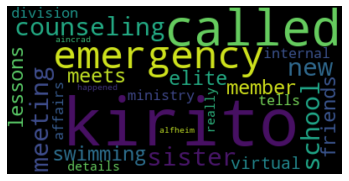

In [16]:
# Data Visualization to find which word occur more frequently when the outcome is Comedy
from wordcloud import WordCloud, ImageColorGenerator

for i in range(len(count)):         # Count variable has the data where the outcome is ComedyGenre = 1
    wordcloud = WordCloud().generate(main_dataset.story[i])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

### Model building 

In [17]:
class_names = ['Comedy','Non-Comedy']

In [18]:
# Function to show the Confusion Matrix
import numpy as np
def plot_cf(cm, names, title='Confusion Matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(names))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

#### Logistic Regression Model

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
log_model = LogisticRegression()
X_train, X_test, y_train, y_test = train_test_split(X, main_dataset['ComedyGenre'], test_size=0.3,random_state=0, stratify = main_dataset['ComedyGenre'] )
# Splitting the dataset into Train and Test (70/30). Training dataset is the vector formed using TF-IDF 
# Since the dataset is imbalanced, 
log_model.fit(X_train, y_train)
y_train_hat_log = log_model.predict(X_train)
y_test_hat_log = log_model.predict(X_test)
print("In sample accuracy for Logistic Regression = ", round(accuracy_score(y_train,y_train_hat_log) * 100,2))
print("Out sample accuracy for Logistic Regression", round(accuracy_score(y_test,y_test_hat_log) * 100,2))

In sample accuracy for Logistic Regression =  83.65
Out sample accuracy for Logistic Regression 78.55


Logistic Regression Results
F1 score: 0.7469348465987271
Accuracy score: 0.7855
Confusion matrix: 
 [[4275  145]
 [1142  438]]
Plotting confusion matrix


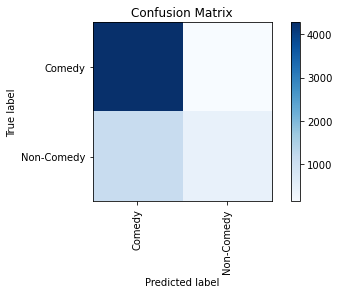

              precision    recall  f1-score   support

           0       0.79      0.97      0.87      4420
           1       0.75      0.28      0.40      1580

    accuracy                           0.79      6000
   macro avg       0.77      0.62      0.64      6000
weighted avg       0.78      0.79      0.75      6000



In [20]:
from sklearn import metrics

log_f1 = metrics.f1_score(y_test, y_test_hat_log, average= "weighted")
log_accuracy = metrics.accuracy_score(y_test, y_test_hat_log)
log_cm = metrics.confusion_matrix(y_test, y_test_hat_log)
print("Logistic Regression Results")
print("F1 score: {}".format(log_f1))
print("Accuracy score: {}".format(log_accuracy))
print("Confusion matrix: \n", log_cm)
print('Plotting confusion matrix')

plt.figure()
plot_cf(log_cm, class_names)
plt.show()

print(metrics.classification_report(y_test, y_test_hat_log))

#### Random Forest Classifier Model

In [21]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=1000, random_state=0)
rf_model.fit(X_train,y_train)
y_train = rf_model.predict(X_train)
y_train_hat_rf = rf_model.predict(X_train)
y_test_hat_rf = rf_model.predict(X_test)
print("In sample accuracy for RandomForestClassifier  = ",round(accuracy_score(y_train,y_train_hat_rf) * 100,2))
print("Out sample accuracy for RandomForestClassifier = ",round(accuracy_score(y_test,y_test_hat_rf) * 100,2))

In sample accuracy for RandomForestClassifier  =  100.0
Out sample accuracy for RandomForestClassifier =  77.13


Random Forest Classifier Results
F1 score: 0.7201815688350328
Accuracy score: 0.7713333333333333
Confusion matrix: 
 [[4302  118]
 [1254  326]]
Plotting confusion matrix


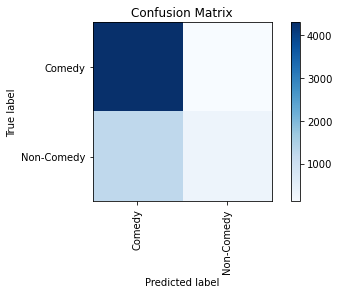

              precision    recall  f1-score   support

           0       0.77      0.97      0.86      4420
           1       0.73      0.21      0.32      1580

    accuracy                           0.77      6000
   macro avg       0.75      0.59      0.59      6000
weighted avg       0.76      0.77      0.72      6000



In [22]:
rf_f1 = metrics.f1_score(y_test, y_test_hat_rf, average= "weighted")
rf_accuracy = metrics.accuracy_score(y_test, y_test_hat_rf)
rf_cm = metrics.confusion_matrix(y_test, y_test_hat_rf)
print("Random Forest Classifier Results")
print("F1 score: {}".format(rf_f1))
print("Accuracy score: {}".format(rf_accuracy))
print("Confusion matrix: \n", rf_cm)
print('Plotting confusion matrix')

plt.figure()
plot_cf(rf_cm, class_names)
plt.show()

print(metrics.classification_report(y_test, y_test_hat_rf))

#### MLP Classifier Model

In [23]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(solver='lbfgs',random_state=0, max_iter=5000, hidden_layer_sizes=[10])
model.fit(X_train,y_train)
y_test_hat_mlp = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat_mlp) * 100,2)

73.23

MLP Classifier Results
F1 score: 0.7305287174593887
Accuracy score: 0.7323333333333333
Confusion matrix: 
 [[3649  771]
 [ 835  745]]
Plotting confusion matrix


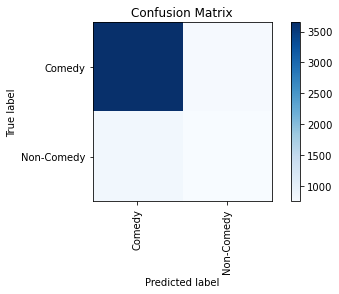

              precision    recall  f1-score   support

           0       0.81      0.83      0.82      4420
           1       0.49      0.47      0.48      1580

    accuracy                           0.73      6000
   macro avg       0.65      0.65      0.65      6000
weighted avg       0.73      0.73      0.73      6000



In [24]:
mlp_f1 = metrics.f1_score(y_test, y_test_hat_mlp, average= "weighted")
mlp_accuracy = metr7ics.accuracy_score(y_test, y_test_hat_mlp)
mlp_cm = metrics.confusion_matrix(y_test, y_test_hat_mlp)
print("MLP Classifier Results")
print("F1 score: {}".format(mlp_f1))
print("Accuracy score: {}".format(mlp_accuracy))
print("Confusion matrix: \n", mlp_cm)
print('Plotting confusion matrix')

plt.figure()
plot_cf(mlp_cm, class_names)
plt.show()

print(metrics.classification_report(y_test, y_test_hat_mlp))

#### SVC Model

In [25]:
from sklearn.svm import SVC
svc_model = SVC(kernel='rbf')
svc_model.fit(X_train,y_train)
y_train_hat_svc = svc_model.predict(X_train)
y_test_hat_svc = svc_model.predict(X_test)
round(accuracy_score(y_test,y_test_hat_svc) * 100,2)

78.23

MLP Classifier Results
F1 score: 0.7305287174593887
Accuracy score: 0.7323333333333333
Confusion matrix: 
 [[3649  771]
 [ 835  745]]
Plotting confusion matrix


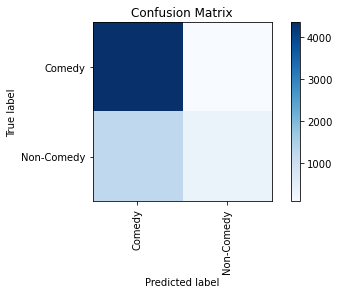

              precision    recall  f1-score   support

           0       0.78      0.98      0.87      4420
           1       0.82      0.22      0.35      1580

    accuracy                           0.78      6000
   macro avg       0.80      0.60      0.61      6000
weighted avg       0.79      0.78      0.73      6000



In [26]:
svc_f1 = metrics.f1_score(y_test, y_test_hat_svc, average= "weighted")
svc_accuracy = metrics.accuracy_score(y_test, y_test_hat_svc)
svc_cm = metrics.confusion_matrix(y_test, y_test_hat_svc)
print("MLP Classifier Results")
print("F1 score: {}".format(mlp_f1))
print("Accuracy score: {}".format(mlp_accuracy))
print("Confusion matrix: \n", mlp_cm)
print('Plotting confusion matrix')

plt.figure()
plot_cf(svc_cm, class_names)
plt.show()

print(metrics.classification_report(y_test, y_test_hat_svc))

#### Decision Tree Model

In [27]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train,y_train)

y_train_hat_dt = dt_model.predict(X_train)
y_test_hat_dt = dt_model.predict(X_test)

in_sample_Accuracy = accuracy_score(y_train, y_train_hat_dt, normalize = True ) * 100
out_sample_Accuracy = accuracy_score(y_test, y_test_hat_dt, normalize=True) * 100
in_sample_Accuracy
out_sample_Accuracy

70.46666666666667

Decision Tree Results
F1 score: 0.7021555335546368
Accuracy score: 0.7046666666666667
Confusion matrix: 
 [[3574  846]
 [ 926  654]]
Plotting confusion matrix


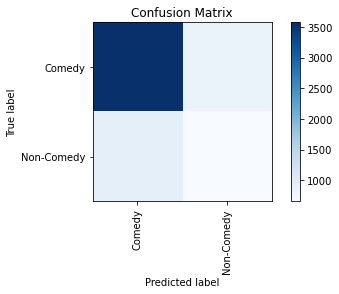

              precision    recall  f1-score   support

           0       0.79      0.81      0.80      4420
           1       0.44      0.41      0.42      1580

    accuracy                           0.70      6000
   macro avg       0.62      0.61      0.61      6000
weighted avg       0.70      0.70      0.70      6000



In [28]:
dt_f1 = metrics.f1_score(y_test, y_test_hat_dt, average= "weighted")
dt_accuracy = metrics.accuracy_score(y_test, y_test_hat_dt)
dt_cm = metrics.confusion_matrix(y_test, y_test_hat_dt)
print("Decision Tree Results")
print("F1 score: {}".format(dt_f1))
print("Accuracy score: {}".format(dt_accuracy))
print("Confusion matrix: \n", dt_cm)
print('Plotting confusion matrix')

plt.figure()
plot_cf(dt_cm, class_names)
plt.show()

print(metrics.classification_report(y_test, y_test_hat_dt))

### Model Selection : 

- Here we have selected the Logistic Regression Model.
- The reason for it is, it has maximum Accuracy (78%) , Precision (75%) and F-1 Score (40%).

In [ ]:
# Step 5 Running Logistic Regression on entire dataset

In [29]:
model = LogisticRegression(max_iter=300)
X_train = X
y_train = main_dataset['ComedyGenre']
model.fit(X_train, y_train)

LogisticRegression(max_iter=300)

### Working on evaluation data
     Here we apply all the steps which we did for the training dataset. 

In [30]:
story_movie_eval_data = pd.read_csv("movie_story_evaluation_file.csv")
merge_set_2 = pd.merge(story_movie_eval_data, genre_movie, left_on ='movie_id', right_on='movieId').drop('movieId', axis = 1).drop('title', axis = 1)
merge_set_2.isnull().any()

movie_id    False
story       False
genres      False
dtype: bool

In [31]:
merge_set_2

movie_id                                              story  \
0       122349  Growing up in the Mission district of San Fran...   
1       122351  A soldier returns home from the Iraq war only ...   
2       122361  Marco the Monkey works as a beach officer. But...   
3       187901  When an honest cop, Vijay Kumar\'s family is r...   
4       187903  Kathiresan aka Kaththi, a criminal, escapes fr...   
...        ...                                                ...   
3493    131062  In the middle of nowhere, 20 years after an ap...   
3494    131064  After living for years as a struggling artist ...   
3495    131066  Ronal is a young barbarian with low self-estee...   
3496    131068  Ziege, H\xc3\xa4schen and Max have now moved t...   
3497    131070  During their childhood, Hanna and Clarissa wer...   

                           genres  
0                           Drama  
1                 Horror|Thriller  
2       Animation|Children|Comedy  
3                  Action|Romance  
4            Action|Drama|Romance  
...                           ...  
3493         Drama|Fantasy|Sci-Fi  
3494                       Comedy  
3495  Adventure|Animation|Fantasy  
3496                       Comedy  
3497       Drama|Mystery|Thriller  

[3498 rows x 3 columns]

In [32]:
new_data_2 = merge_set_2['genres'].str.contains("Comedy").map({False:0,True:1})
merge_set_2['ComedyGenre'] = new_data_2

In [33]:
merge_set_2.pop('genres')
evaluation_dataset = merge_set_2.copy()

In [34]:
evaluation_dataset.to_csv('evaluation_dataset.csv',index=False,)

In [35]:
evaluation_dataset = pd.read_csv('evaluation_dataset.csv')

In [36]:
evaluation_dataset

movie_id                                              story  ComedyGenre
0       122349  Growing up in the Mission district of San Fran...            0
1       122351  A soldier returns home from the Iraq war only ...            0
2       122361  Marco the Monkey works as a beach officer. But...            1
3       187901  When an honest cop, Vijay Kumar\'s family is r...            0
4       187903  Kathiresan aka Kaththi, a criminal, escapes fr...            0
...        ...                                                ...          ...
3493    131062  In the middle of nowhere, 20 years after an ap...            0
3494    131064  After living for years as a struggling artist ...            1
3495    131066  Ronal is a young barbarian with low self-estee...            0
3496    131068  Ziege, H\xc3\xa4schen and Max have now moved t...            1
3497    131070  During their childhood, Hanna and Clarissa wer...            0

[3498 rows x 3 columns]

#### Performing all the Data Cleaning, Pre-processing and Text Analysis on the evaluation data as well

In [37]:
# Converting to lower case
evaluation_dataset['story'] = evaluation_dataset['story'].apply(lambda x: " ".join(x.lower() for x in x.split()))
evaluation_dataset['story'].head()

0    growing up in the mission district of san fran...
1    a soldier returns home from the iraq war only ...
2    marco the monkey works as a beach officer. but...
3    when an honest cop, vijay kumar\'s family is r...
4    kathiresan aka kaththi, a criminal, escapes fr...
Name: story, dtype: object

In [38]:
# Removing Special characters

evaluation_dataset['story'] = evaluation_dataset['story'].str.replace('[^\w\s]','')
evaluation_dataset['story'].head()

0    growing up in the mission district of san fran...
1    a soldier returns home from the iraq war only ...
2    marco the monkey works as a beach officer but ...
3    when an honest cop vijay kumars family is ruth...
4    kathiresan aka kaththi a criminal escapes from...
Name: story, dtype: object

In [39]:
# Removing Stop words
from nltk.corpus import stopwords
stop = stopwords.words('english')
evaluation_dataset['story']  = evaluation_dataset['story'] .apply(lambda x: " ".join(x for x in x.split() if x not in stop))
evaluation_dataset['story'] .head()

0    growing mission district san francisco che riv...
1    soldier returns home iraq war haunted visions ...
2    marco monkey works beach officer spends time t...
3    honest cop vijay kumars family ruthlessly slau...
4    kathiresan aka kaththi criminal escapes kolkat...
Name: story, dtype: object

In [40]:
# Stemming
from nltk.stem import PorterStemmer
st = PorterStemmer()
evaluation_dataset['story'].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0       grow mission district san francisco che rivera...
1          soldier return home iraq war haunt vision dead
2       marco monkey work beach offic spend time tri w...
3       honest cop vijay kumar famili ruthlessli slaug...
4       kathiresan aka kaththi crimin escap kolkata pr...
                              ...                        
3493    middl nowher 20 year apocalypt terrorist event...
3494    live year struggl artist new york citi jake ca...
3495    ronal young barbarian low selfesteem polar opp...
3496    zieg hxc3xa4schen max move berlin studi aint g...
3497    childhood hanna clarissa best friend spent eve...
Name: story, Length: 3498, dtype: object

In [41]:
#Lemmitizing
for text in evaluation_dataset['story']:
    tokens = word_tokenize(text)
    print([Lemmatizer.lemmatize(token, pos="v") for token in tokens])
evaluation_dataset['story']

['grow', 'mission', 'district', 'san', 'francisco', 'che', 'rivera', 'always', 'tough', 'survive', 'hes', 'powerful', 'man', 'respect', 'throughout', 'mission', 'barrio', 'masculinity', 'strength', 'well', 'hobby', 'build', 'beautiful', 'lowrider', 'cars', 'reform', 'inmate', 'recover', 'alcoholic', 'che', 'work', 'hard', 'redeem', 'life', 'right', 'pride', 'joy', 'son', 'jes', 'raise', 'death', 'wife', 'ches', 'path', 'redemption', 'test', 'however', 'discover', 'jes', 'gay', 'survive', 'neighborhood', 'che', 'always', 'live', 'fists', 'survive', 'complete', 'man', 'hell', 'embrace', 'side', 'hes', 'never', 'show']
['soldier', 'return', 'home', 'iraq', 'war', 'haunt', 'visions', 'dead']
['marco', 'monkey', 'work', 'beach', 'officer', 'spend', 'time', 'try', 'win', 'heart', 'beautiful', 'lulu', 'succeed', 'marcos', 'rival', 'carlo', 'build', 'gigantic', 'monkeyshaped', 'casino', 'right', 'marcos', 'beach', 'lulu', 'fascinate', 'charm', 'carlo', 'jealously', 'marco', 'start', 'undercove

['american', 'teenager', 'obsess', 'hong', 'kong', 'cinema', 'kungfu', 'classics', 'make', 'extraordinary', 'discovery', 'chinatown', 'pawnshop', 'legendary', 'stick', 'weapon', 'chinese', 'sage', 'warrior', 'monkey', 'king', 'lose', 'relic', 'hand', 'teenager', 'unexpectedly', 'find', 'travel', 'back', 'ancient', 'china', 'join', 'crew', 'warriors', 'martial', 'arts', 'lore', 'dangerous', 'quest', 'free', 'imprison', 'monkey', 'king']
['hannah', 'intimate', 'portrait', 'womanxe2x80x99s', 'loss', 'identity', 'teeter', 'denial', 'reality', 'leave', 'alone', 'grapple', 'consequences', 'husbandxe2x80x99s', 'imprisonment', 'hannah', 'begin', 'unravel', 'exploration', 'fracture', 'sense', 'identity', 'loss', 'selfcontrol', 'film', 'investigate', 'modern', 'day', 'alienation', 'struggle', 'connect', 'divide', 'line', 'individual', 'identity', 'personal', 'relationships', 'societal', 'pressure']
['morgan', 'spurlock', 'super', 'size', 'tour', 'middle', 'east', 'discuss', 'war', 'terror', 'ara

['unnamed', 'latin', 'american', 'country', 'closely', 'resemble', 'mexico', 'government', 'fight', 'rural', 'insurgency', 'torture', 'assault', 'rape', 'murder', 'soldier', 'descend', 'town', 'cut', 'rebel', 'cache', 'ammunition', 'hide', 'field', 'family', 'grandfather', 'son', 'grandson', 'among', 'rebel', 'hill', 'grandfather', 'violin', 'shoulder', 'try', 'pass', 'checkpoint', 'ostensibly', 'tend', 'corn', 'crop', 'command', 'officer', 'let', 'pass', 'insist', 'daily', 'music', 'lesson']
['admit', 'mt', 'abaddon', 'hospital', 'routine', 'procedure', 'george', 'grieve', 'discover', 'condition', 'much', 'serious', 'complicate', 'originally', 'expect', 'fear', 'begin', 'manifest', 'around', 'learn', 'mt', 'abaddon', 'place', 'people', 'come', 'get', 'better', 'place', 'people', 'come', 'die']
['young', 'arabamerican', 'girl', 'struggle', 'sexual', 'obsession', 'bigoted', 'army', 'reservist', 'strict', 'father', 'gulf', 'war']
['june', 'nantucket', 'film', 'festival', 'ben', 'stiller'

['fail', 'architect', 'engineer', 'vicious', 'murderer', 'jack', 'narrate', 'detail', 'elaborately', 'orchestrate', 'crimes', 'tower', 'piece', 'art', 'define', 'lifes', 'work', 'serial', 'killer', 'twelve', 'years']
['jerry', 'shaw', 'rachel', 'holloman', 'two', 'strangers', 'whose', 'live', 'suddenly', 'throw', 'turmoil', 'mysterious', 'woman', 'never', 'meet', 'threaten', 'live', 'family', 'unseen', 'caller', 'use', 'everyday', 'technology', 'control', 'action', 'push', 'increase', 'danger', 'events', 'escalate', 'jerry', 'rachel', 'become', 'countrys', 'mostwanted', 'fugitives', 'must', 'figure', 'happen']
['successful', 'entrepreneur', 'max', 'learn', 'woman', 'marry', 'always', 'really', 'interest', 'money', 'wife', 'cousin', 'ricky', 'get', 'burn', 'golddigger', 'ricky', 'introduce', 'max', 'world', 'pickup', 'artist', 'hop', 'give', 'max', 'confidence', 'tool', 'find', 'woman', 'like']
['follow', 'tip', 'manabu', 'yazaki', 'lose', 'last', 'money', 'bet', 'older', 'banba', 'hors

['mika', 'work', 'nurse', 'day', 'night', 'entertain', 'covetous', 'men', 'girlsxe2x80x99', 'bar', 'shinji', 'blind', 'one', 'eye', 'ekes', 'live', 'construction', 'worker', 'young', 'grownup', 'time', 'lead', 'lonely', 'existence', 'somehow', 'paths', 'keep', 'miraculously', 'cross', 'tokyo', 'sky', 'loneliness', 'experience', 'together']
['mike', 'say', 'years', 'ago', 'therapist', 'suggest', 'keep', 'journal', 'crazy', 'things', 'go', 'life', 'could', 'keep', 'things', 'perspective', 'around', 'time', 'audiences', 'demand', 'material', 'realize', 'people', 'might', 'enjoy', 'storiesso', 'start', 'send', 'mail', 'list', 'secret', 'public', 'journal', 'become', 'comedy', 'central', 'special', 'dvd', 'world', 'see', 'sure', 'therapist', 'mind']
['heckler', 'comedic', 'feature', 'documentary', 'explore', 'increasingly', 'critical', 'world', 'live', 'star', 'film', 'critically', 'bash', 'jamie', 'kennedy', 'take', 'hecklers', 'critics', 'ask', 'interest', 'question', 'people', 'george', 

['shy', 'reserve', 'claire', 'decker', '30ish', 'parttime', 'investigator', 'social', 'service', 'typically', 'solve', 'case', 'senior', 'citizens', 'die', 'alone', 'leave', 'indication', 'must', 'handle', 'estate', 'time', 'however', 'claire', 'reluctantly', 'draw', 'puzzle', 'murder', 'case', 'local', 'police', 'unable', 'solve', 'horrific', 'crime', 'even', 'decipher', 'victims', 'true', 'identity', 'beautiful', 'enigmatic', 'young', 'blond', 'know', 'white', 'orchid', 'brutally', 'murder', 'claire', 'draw', 'deeper', 'intimately', 'dead', 'womans', 'life', 'find', 'take', 'dangerous', 'chance', 'push', 'personal', 'professional', 'boundaries', 'get', 'closer', 'truth', 'claire', 'must', 'effectively', 'become', 'charismatic', 'white', 'orchid', 'order', 'solve', 'mysterious', 'crime']
['popular', 'sensation', 'medieval', 'europe', 'bestiaries', 'catalog', 'beasts', 'feature', 'exotic', 'animal', 'illustrations', 'zoological', 'wisdom', 'ancient', 'legends', 'documentary', 'unfold',

['tough', 'nightclub', 'bouncer', 'struggle', 'raise', '8yearold', 'daughter', 'force', 'go', 'undercover', 'unfortunate', 'event']
['former', 'club', 'de', 'cuervos', 'player', 'potro', 'return', 'home', 'argentina', 'crash', 'wed', 'famous', 'soccerstar', 'brother', 'confront', 'estrange', 'family']
['bleak', 'inverness', 'midwinter', 'luisaidh', 'careen', 'rail', 'suicide', 'best', 'friend', 'medicate', 'misery', 'joyless', 'sex', 'chip', 'belief', 'power', 'positive', 'drink', 'surround', 'bittersweet', 'memories', 'struggle', 'find', 'someone', 'talk', 'reason', 'make', 'life', 'worthwhile', 'stressful', 'time', 'year']
['woman', 'take', 'along', 'mother', '1910', 'faraway', 'desert', 'husband', 'pass', 'force', 'spend', 'next', '59', 'years', 'life', 'hopelessly', 'try', 'escape']
['sequel', 'flower', 'attic', 'pick', '10', 'years', 'cathy', 'chris', 'carrie', 'manage', 'escape', 'foxworth', 'hall']
['funny', 'character', 'cumali', 'ceber', 'go', 'vacation', 'unclever', 'friends'

0       growing mission district san francisco che riv...
1       soldier returns home iraq war haunted visions ...
2       marco monkey works beach officer spends time t...
3       honest cop vijay kumars family ruthlessly slau...
4       kathiresan aka kaththi criminal escapes kolkat...
                              ...                        
3493    middle nowhere 20 years apocalyptic terrorist ...
3494    living years struggling artist new york city j...
3495    ronal young barbarian low selfesteem polar opp...
3496    ziege hxc3xa4schen max moved berlin studying a...
3497    childhood hanna clarissa best friends spent ev...
Name: story, Length: 3498, dtype: object

In [42]:
# Applying TfidVectorizer 

vect = TfidfVectorizer(ngram_range=(1,3),min_df = 10)
X_eval = vect.fit_transform(evaluation_dataset['story'])
df2 = pd.DataFrame(X_eval.toarray(), columns=vect.get_feature_names())

In [43]:
count_eval=[]
b=0
for i in range(len(evaluation_dataset)):
    if evaluation_dataset.ComedyGenre[i] == 1:
        count_eval.append(i)
        b=b+1
b

875

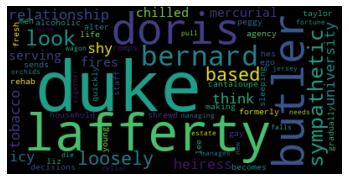

In [44]:
for i in range(len(count_eval)):
    wordcloud = WordCloud().generate(evaluation_dataset.story[i])
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off");

In [45]:
model = LogisticRegression(max_iter=300)
X_train, X_test, y_train, y_test = train_test_split(X_eval, evaluation_dataset['ComedyGenre'], test_size=0.3,random_state=0, stratify = evaluation_dataset['ComedyGenre'])
model.fit(X_train, y_train)
y_test_hat_eval = model.predict(X_test)
round(accuracy_score(y_test,y_test_hat_eval) * 100,2)

75.81

Logistic Regression Results
F1 score: 0.6754356113182556
Accuracy score: 0.758095238095238
Confusion matrix: 
 [[778   9]
 [245  18]]
Plotting confusion matrix


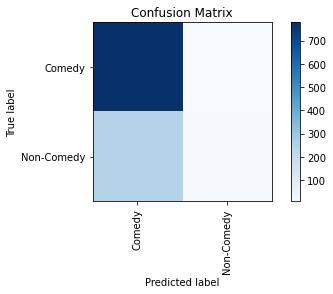

              precision    recall  f1-score   support

           0       0.76      0.99      0.86       787
           1       0.67      0.07      0.12       263

    accuracy                           0.76      1050
   macro avg       0.71      0.53      0.49      1050
weighted avg       0.74      0.76      0.68      1050



In [46]:
log_f1 = metrics.f1_score(y_test, y_test_hat_eval, average= "weighted")
log_accuracy = metrics.accuracy_score(y_test, y_test_hat_eval)
log_cm = metrics.confusion_matrix(y_test, y_test_hat_eval)
print("Logistic Regression Results")
print("F1 score: {}".format(log_f1))
print("Accuracy score: {}".format(log_accuracy))
print("Confusion matrix: \n", log_cm)
print('Plotting confusion matrix')

plt.figure()
plot_cf(log_cm, class_names)
plt.show()

print(metrics.classification_report(y_test, y_test_hat_eval))

### Conclusion

- After running the model on the evaluation data, we got the following results:
    Accuracy : 76%
    Precision : 67%
    Recall : 7%
    F-1 Score : 12%
